# Final Project Submission

Please fill out:
* Student name: Imelda Masika
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Noah Kandie
* Blog post URL:


# Overview

Due to the increased production of original films by major companies, Microsoft has requested that we assess the movie industry's outlook and provide recommendations before making any decisions. Our evaluation involved using return on investment as a metric to measure the profitability of specific genres. We also analyzed the best performing studios at the movie box office and examined the most popular genres with high viewer votes to derive our conclusions.

## Business Problem

For Microsoft, the key challenge in venturing into the original video content space is devising a strategy to produce content that can compete with established rivals like Netflix and Amazon and entice and retain audiences. To achieve this, Microsoft will need to set itself apart by:

Making substantial investments in content development, talent recruitment, and marketing.
Developing a thorough understanding of audience preferences and trends.
Determining a monetization approach that balances the expenses of content creation with revenue sources such as advertising or subscriptions.

My analysis was based on three crucial factors:

1. Determining the most prevalent genre.
2. Examining the correlation between production budget and return on investment.
3. What are the best performing studios at the movie box office?

Determining the most prevalent genre.
This can be
Examining the correlation between production costs and revenue.
Identifying the optimal month for releasing a movie.

## Data Understanding

This analysis involves utilizing data from three different movie websites, Box Office Mojo, The Numbers, and TMDB. 

* The first dataset, bom.movie_gross.csv, contains movie titles, studios, domestic and foreign financial earnings, and release year.


In [2]:
import csv
import pandas as pd


In [3]:
bom_movie = pd.read_csv('bom.movie_gross.csv.gz')
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


* The second dataset, tn.movie_budgets.csv, includes information on movie releases, such as names, release dates, production budget, worldwide gross. The key variable for this dataset is the ROI, and the monetary data columns are the primary reason for selecting this dataset.


In [4]:
movies_budgets = pd.read_csv('tn.movie_budgets.csv.gz')
movies_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


* The third dataset, tmdb.movies.csv, includes genre codes, original language, original movie titles, popularity metrics, release dates, and votes. This dataset was used to convert genre codes into genre names to identify trending genres.This dataset can be used to map genre codes to genre names obtained from the same website so that it can be seen which genres are more trending.

In [5]:
tmdb_movies = pd.read_csv('tmdb.movies.csv.gz')
tmdb_movies 

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


So now we go deeper into the data so that we can have some more understanding

###  Load packages and Libraries

In [6]:
# importing necessary packages
import pandas as pd
# setting pandas display to avoid scientific notation in the dataframes
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### This the first dataset which is the bom.movie_gross.csv

In [7]:
bom_movie = pd.read_csv('bom.movie_gross.csv.gz')
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,NaN,2018
3383,Edward II (2018 re-release),FM,4800.00,NaN,2018
3384,El Pacto,Sony,2500.00,NaN,2018
3385,The Swan,Synergetic,2400.00,NaN,2018


The DataFrame 'bom_movie' contains 3387 rows and 5 columns with the following information about movies:

1. title: the title of the movie
2. studio: the studio that produced the movie
3. domestic_gross : the domestic gross revenue of the movie in dollars (dollars indicating that this is USA)
4. foreign_gross : the foreign gross revenue of the movie in dollars
5. year: the year in which the movie was released

The first few rows of the DataFrame are also shown in the output.

In [8]:
# getting infomation  for the DataFrame
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


1. The title, studio, and foreign_gross columns have object data type, meaning they contain strings or a mixture of strings and other data types.
2. The domestic_gross column has float64 data type, meaning it contains numerical data in decimal format.
3. The year column has int64 data type, meaning it contains integer values.
4. The studio column has 5 missing values, and the domestic_gross and foreign_gross columns have 28 and 1350 missing values, respectively.

In [9]:
#  descriptive statistics for domestic box office values
bom_movie['domestic_gross'].describe()

count        3359.00
mean     28745845.07
std      66982498.24
min           100.00
25%        120000.00
50%       1400000.00
75%      27900000.00
max     936700000.00
Name: domestic_gross, dtype: float64

The output shows the summary statistics of the domestic_gross column of the DataFrame bom_movie which icludes the count, mean.standard deviation, the minimum value, the quatiles and the maximum values of the the domestic gross

1. The mean of the column is approximately 28.75 million dollars.
2. The standard deviation of the column is approximately 66.98 million dollars, indicating that the data is spread out widely.
3. The minimum value of the column is 100 dollars, meaning that there are movies in the dataset that made very little money.
4. The maximum value of the column is approximately 936.7 million dollars, indicating that there are movies in the dataset that made a lot of money domestically.

In [10]:
#descriptive statistics for production budget values
bom_movie['foreign_gross'].describe()

count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object

The output shows the summary statistics of the 'foreign_gross' column of the DataFrame 'bom_movie_df':

1. The count of non-null values is 2037, meaning there are 1350 missing values in the column.I will deal with this in the data cleaning section.
2. The unique count of values is 1204, meaning that there are 1204 unique values in the column, which implies that some movies had multiple foreign gross values.
3. The top value in the column is '1200000', which appears 23 times, implying that there are 23 movies that made 1.2 million dollars in foreign markets.
4. The frequency (freq) shows how many times the top value appears in the column.

#### The second dataset is the datafiles/tn.movie_budgets.csv

In [11]:
#Loading the movie budget dataset
movies_budgets = pd.read_csv('tn.movie_budgets.csv.gz')
movies_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


The movie_budgets_df dataframe contains 5782 rows and 6 columns. Each row represents a movie with its corresponding budget and gross revenue information. The columns are:

1. id: a unique identifier for each movie
2. release_date: the date when the movie was released in theaters
3. movie: the title of the movie
4. production_budget: the estimated production budget of the movie
5. domestic_gross: the gross revenue of the movie in the domestic market in North America
6. worldwide_gross: the gross revenue of the movie worldwide.

In [12]:
# A description for DataFrame
movies_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


We'll start by cleaning and transforming the movie_budgets_df dataframe. We can remove the dollar signs and commas from the production_budget, domestic_gross, and worldwide_gross columns using the str.replace() method. We'll also convert these columns which are objects to numeric data types.

In [13]:
# generating a brief description for DataFrame
movies_budgets.describe()

,id
count,5782.00
mean,50.37
std,28.82
min,1.00
25%,25.00
50%,50.00
75%,75.00
max,100.00


Since .describe() automatically picks up integers it will only pick up id column as the production_budget, domestic_gross and worldwide_gross have commas and $ hence are considered objects

#### The third dataset which is  tmdb.movies.csv

In [14]:
#load the dataset
tmdb_movies = pd.read_csv('tmdb.movies.csv.gz')
tmdb_movies 

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.60,2018-10-01,The Last One,0.00,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1


This will load the tmdb.movies.csv file into a pandas dataframe called tmdb_movies. The index_col=0 argument specifies that the first column of the csv file should be used as the index of the dataframe. The tmdb_movies dataframe has 26,518 rows and 9 columns. 

A brief description of the columns is as follows:

1. genre_ids: a list of integers representing the genre of the movie
2. id: unique identifier for the movie
3. original_language: the original language of the movie
4. original_title: the original title of the movie
5. popularity: a measure of the popularity of the movie
6. release_date: the date on which the movie was released
7. title: the title of the movie
8. vote_average: the average rating of the movie
9. vote_count: the number of votes cast for the movie.

In [15]:
#Looking at data info
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


The dataset is complete as it has no missing values.

In [16]:
#sorting by the "popularity" column in ascending order
tmdb_movies.sort_values(by=["popularity"], ascending=True).head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
13258,13258,[99],403294,en,9/11: Simulations,0.60,2014-07-04,9/11: Simulations,10.00,1
11010,11010,[],203325,en,Slaves Body,0.60,2013-06-25,Slaves Body,0.50,1
11011,11011,[99],186242,en,Re-Emerging: The Jews of Nigeria,0.60,2013-05-17,Re-Emerging: The Jews of Nigeria,0.50,2
11012,11012,[99],116868,en,Occupation: Fighter,0.60,2013-08-02,Occupation: Fighter,0.50,2
11013,11013,[99],85337,en,Wonders Are Many: The Making of Doctor Atomic,0.60,2013-08-07,Wonders Are Many: The Making of Doctor Atomic,0.50,2


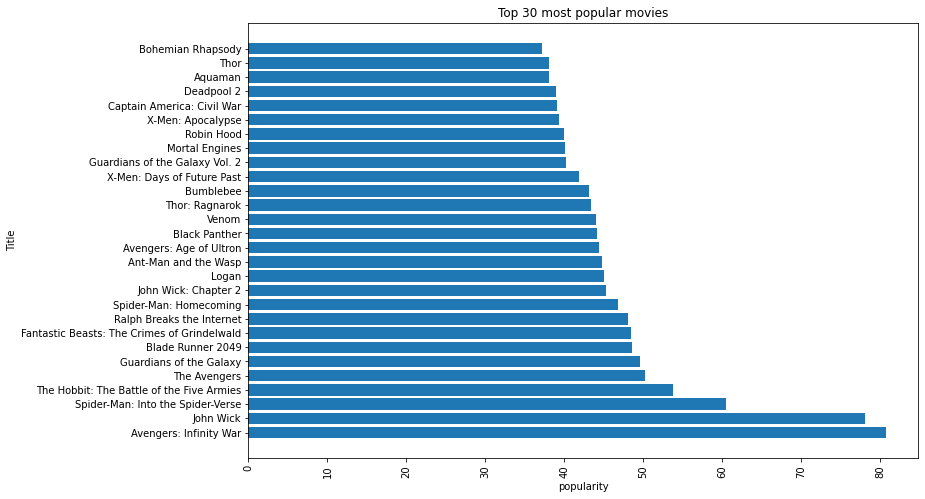

In [17]:
plt.figure(figsize=(12,8))
top_30 = tmdb_movies.sort_values(by='popularity', ascending=False).head(30)
plt.barh(top_30['title'], top_30['popularity'])
plt.xlabel('popularity')
plt.xticks(rotation=90)
plt.ylabel('Title')
plt.title('Top 30 most popular movies')
plt.show()

It seems like some of these movies may not have been widely known or popular with popularity as low as 0.6 and vote_counts as low as 1, hence the low popularity values.

### DATA CLEANING

Now that we have loaded the data and tried to make sense of it we can proceed to clean up the data so that in can be ready for use

#### Box office mojo

In [18]:
# convert "foreign_gross' column to a float 
bom_movie['foreign_gross'] = pd.to_numeric(bom_movie['foreign_gross'], errors='coerce')
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000.00,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000.00,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000.00,2010
3,Inception,WB,292600000.00,535700000.00,2010
4,Shrek Forever After,P/DW,238700000.00,513900000.00,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,nan,2018
3383,Edward II (2018 re-release),FM,4800.00,nan,2018
3384,El Pacto,Sony,2500.00,nan,2018
3385,The Swan,Synergetic,2400.00,nan,2018


The pd.to_numeric() method is used to convert the values in the column to numeric data type (float) and the errors='coerce' parameter specifies that if any value can't be converted, it will be set to NaN (Not a Number).

In [19]:
#regenerating descriptive statistics for production budget values
bom_movie['foreign_gross'].describe()

count        2032.00
mean     75057041.63
std     137529351.20
min           600.00
25%       3775000.00
50%      18900000.00
75%      75050000.00
max     960500000.00
Name: foreign_gross, dtype: float64

The output shows the summary statistics of the 'foreign_gross' column of the DataFrame 'bom_movie_df':

1. mean: the mean (average) value of the column.
2. std: the standard deviation of the values in the column.
3. min: the smallest value in the column.
4. max: the largest value in the column.

In [20]:
#checking for missing values in the bom_movie_df
bom_movie.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

This data has 5 missing values in the studio column, 28 missing values in the domestic_gross column, and 1355 missing values in the foreign_gross column.

In [21]:
# replacing missing values in the "studio" column with the string "None"
bom_movie["studio"].fillna("None", inplace = True) 
# replacing missing values in the "domestic_gross" and "foreign_gross" columns with the value 0, 
bom_movie["domestic_gross"].fillna(0, inplace = True)
bom_movie["foreign_gross"].fillna(0, inplace = True)

bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000.00,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000.00,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000.00,2010
3,Inception,WB,292600000.00,535700000.00,2010
4,Shrek Forever After,P/DW,238700000.00,513900000.00,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,0.00,2018
3383,Edward II (2018 re-release),FM,4800.00,0.00,2018
3384,El Pacto,Sony,2500.00,0.00,2018
3385,The Swan,Synergetic,2400.00,0.00,2018


By filling missing values in the "studio" column with the string "None" and replacing missing values in the "domestic_gross" and "foreign_gross" columns with the value 0, I would have handled the missing values in the bom_movie_df dataframe. This will help ensure that your analysis is not affected by missing data.

In [22]:
#rechecking for missing values in the bom_movie
bom_movie.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

#### The numbers movie budgets

In [23]:
#checking for missing values
missing_values_count = movies_budgets.isnull().sum()
print(missing_values_count)

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


To clean up this dataframe we replace commas and dollar signs in the worldwide_gross, domestic_gross, and production_budge columns with nothing ('') and then convert them to floats 

In [24]:
movies_budgets['domestic_gross'] = pd.to_numeric(movies_budgets['domestic_gross'].str[1:].str.replace(',', ''))
movies_budgets['production_budget'] =pd.to_numeric(movies_budgets['production_budget'].str[1:].str.replace(',', ''))
movies_budgets['worldwide_gross'] = pd.to_numeric(movies_budgets['worldwide_gross'].str[1:].str.replace(',', ''))

movies_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


Applies a lambda function to each column selected above the x.str.replace(',', ''): Replaces commas in the string values with empty strings. This replaces the original string values with float values in the specified columns of the movie_budgets dataframe.

In [25]:
#merge the bom_movie_df and movie_budget df on movie titles
merged_df = pd.merge(bom_movie, movies_budgets, how='inner', left_on='title', right_on='movie')
#drop title and domestic_gross since they appear in both dataframes
merged_df = merged_df.drop(['domestic_gross_y', 'title'], axis=1)
#preview the merged dataframe
merged_df

,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,worldwide_gross
0,BV,415000000.00,652000000.00,2010,47,"Jun 18, 2010",Toy Story 3,200000000,1068879522
1,WB,292600000.00,535700000.00,2010,38,"Jul 16, 2010",Inception,160000000,835524642
2,P/DW,238700000.00,513900000.00,2010,27,"May 21, 2010",Shrek Forever After,165000000,756244673
3,Sum.,300500000.00,398000000.00,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,706102828
4,Par.,312400000.00,311500000.00,2010,15,"May 7, 2010",Iron Man 2,170000000,621156389
...,...,...,...,...,...,...,...,...,...
1242,VE,4300000.00,0.00,2018,64,"Jun 15, 2018",Gotti,10000000,6089100
1243,RAtt.,3700000.00,0.00,2018,95,"Dec 7, 2018",Ben is Back,13000000,9633111
1244,VE,491000.00,1700000.00,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000,648599
1245,RLJ,1200000.00,0.00,2018,71,"Sep 14, 2018",Mandy,6000000,1427656


I am merging the two dataframes on the "title" column, which is a good start. I also dropped the "domestic_gross_y" and "title" columns, which is necessary since they appear in both dataframes.

In [26]:
# Filter the DataFrame to include only years above 2013
movie_budgets_filtered_df = merged_df[merged_df['year'] >= 2013]
movie_budgets_filtered_df

,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,worldwide_gross
496,BV,400700000.00,875700000.00,2013,56,"Nov 22, 2013",Frozen,150000000,1272469910
497,BV,409000000.00,805800000.00,2013,48,"May 3, 2013",Iron Man 3,200000000,1215392272
498,Uni.,368100000.00,602700000.00,2013,22,"Jul 3, 2013",Despicable Me 2,76000000,975216835
499,WB (NL),258399999.00,700000000.00,2013,21,"Dec 13, 2013",The Hobbit: The Desolation of Smaug,250000000,960366855
500,LGF,424700000.00,440300000.00,2013,38,"Nov 22, 2013",The Hunger Games: Catching Fire,130000000,864868047
...,...,...,...,...,...,...,...,...,...
1242,VE,4300000.00,0.00,2018,64,"Jun 15, 2018",Gotti,10000000,6089100
1243,RAtt.,3700000.00,0.00,2018,95,"Dec 7, 2018",Ben is Back,13000000,9633111
1244,VE,491000.00,1700000.00,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000,648599
1245,RLJ,1200000.00,0.00,2018,71,"Sep 14, 2018",Mandy,6000000,1427656


This code filters the merged_df to only include movies from 2013 onwards and saves it as movie_budgets_filtered_df. Now we have reduced our dataset to 751 rows.

#### TheMovieDB

Since the dataset is too large, I want to sort it in a way that allows me to work with fewer movies. I decided to sort them with their vote_counts.

In [27]:
# creating a list of all the vote_counts and sorting them
vote_counts = tmdb_movies['vote_count'].tolist()
vote_counts_sorted = sorted(vote_counts)

In [28]:
# Define a function to filter a list to values between two numbers
def filter_list(lst, min_val, max_val):
    filtered_list = [x for x in lst if (x > min_val) and (x < max_val)]
    return filtered_list

In [29]:
# Count the number of movies that have vote counts between 1000 and 23000
num_movies = len(filter_list(vote_counts_sorted, 999, 23000))
num_movies

1108

In [30]:
# Filter the DataFrame to only include movies with vote counts of 1000 or more
filtered_tmdb = tmdb_movies[tmdb_movies['vote_count'] >= 1000]
filtered_tmdb 

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
...,...,...,...,...,...,...,...,...,...,...
24112,24112,"[53, 18, 80, 9648]",446791,en,All the Money in the World,10.94,2017-12-25,All the Money in the World,6.40,1200
24128,24128,"[35, 18, 878]",301337,en,Downsizing,10.68,2017-12-22,Downsizing,5.10,1887
24169,24169,"[16, 18, 9648]",339877,en,Loving Vincent,10.03,2017-09-22,Loving Vincent,8.20,1200
24231,24231,[18],538362,it,Sulla mia pelle,9.16,2018-09-12,On My Skin,8.20,1078


The code filters the tmdb_movies dataframe to only include movies that have a vote count of 1000 or more, indicating a relatively popular movie. The resulting dataframe is stored in the variable filtered_tmdb.

In [31]:
# Find duplicates based on all columns
duplicates = filtered_tmdb.duplicated()

# Filter the DataFrame to show only the duplicate rows
duplicate_rows = filtered_tmdb[duplicates]

# Print the duplicate rows
print(len(duplicate_rows))

0


In [32]:
#call it back to show cleaned data
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.60,2018-10-01,The Last One,0.00,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1


In [33]:
#checking for missing values
missing_values_count = tmdb_movies.isnull().sum()
print(missing_values_count)

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


There are no missing values in this dataset

I want to obtain dataset genres that correspond to their respective genre ids.

In [34]:
# genre_ids are list of numbers, actually in a string. 
tmdb_movies.iloc[0]['genre_ids']

'[12, 14, 10751]'

 This code will return a list of genre IDs associated with the first movie in the DataFrame.

In [35]:
#Create dictionary of genre ID and its associated genre name.
#This information is sourced from tmdb website

genre_dict = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}


In [36]:
# creating a dataframe with id and genre columns
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index', columns=['genre'])
genre_df.index.name = 'id'
genre_df.reset_index(inplace=True)
genre_df

,id,genre
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


The genre ids are a list of numbers in a string but I want them to be integers.

In [69]:
#defining a function for removing the brackets from the string in 'genre_ids' and converting each item into an integer
def split_ids(string):
    string = string.replace('[','').replace(']','')
    numbers = string.split(',')
    new_list = []
    for i in numbers:
        if i != '':
            new_list.append(int(i))
    return new_list

    

In [70]:
#applying the "split_ids" function to each value in the "genre_ids" 
def split_ids(input):
    if isinstance(input, str):
        input = input.replace('[','').replace(']','')
        numbers = input.split(',')
        new_list = []
        for i in numbers:
            if i.isdigit():
                new_list.append(int(i))
        return new_list
    elif isinstance(input, list):
        return input
    else:
        return []

In [71]:
def split_ids(string):
    if string == '':
        return []
    else:
        string = string.replace('[','').replace(']','')
        numbers = string.split(',')
        new_list = []
        for i in numbers:
            if i.isdigit():
                new_list.append(int(i))
        return new_list

tmdb_movies['genre_names'] = tmdb_movies['genre_ids'].apply(lambda x: get_genre_names(x))
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788,"[Adventure, Fantasy, Family]"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610,"[Fantasy, Adventure, Animation, Family]"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368,"[Adventure, Action, Science Fiction]"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174,"[Animation, Comedy, Family]"
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186,"[Action, Science Fiction, Adventure]"
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1,"[Horror, Drama]"
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1,"[Drama, Thriller]"
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.60,2018-10-01,The Last One,0.00,1,"[Fantasy, Action, Adventure]"
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1,"[Family, Adventure, Action]"


Now we have a new column called 'genre_names' which is mapped onto corresponding 'genre_ids'.

## Data Analysis & Visualizations

#####  1. Determining the most prevalent genre.


Merge tmdb with movie budgets

In [43]:
#merge the movie_budgets_filtered_df and tmdb_df_filtered on movie titles
final_merged_df = pd.merge(tmdb_movies, movie_budgets_filtered_df , how='inner', left_on='title', right_on='movie')
final_merged_df

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,genre_names,studio,domestic_gross_x,foreign_gross,year,id_y,release_date_y,movie,production_budget,worldwide_gross
0,148,[53],44363,en,Frozen,9.68,2010-02-05,Frozen,5.80,987,[Thriller],BV,400700000.00,875700000.00,2013,56,"Nov 22, 2013",Frozen,150000000,1272469910
1,7886,"[16, 12, 10751]",109445,en,Frozen,26.18,2013-11-27,Frozen,7.30,9767,"[Animation, Adventure, Family]",BV,400700000.00,875700000.00,2013,56,"Nov 22, 2013",Frozen,150000000,1272469910
2,321,"[18, 9648, 10749]",38407,en,Shanghai,6.82,2010-10-02,Shanghai,6.10,80,"[Drama, Mystery, Romance]",Wein.,46400.00,9200000.00,2015,5,"Oct 2, 2015",Shanghai,50000000,15505922
3,801,[878],136921,en,Pixels,2.17,2010-04-01,Pixels,7.10,35,[Science Fiction],Sony,78700000.00,166100000.00,2015,59,"Jul 24, 2015",Pixels,90000000,244041804
4,14187,"[28, 35, 878]",257344,en,Pixels,23.03,2015-07-24,Pixels,5.60,4423,"[Action, Comedy, Science Fiction]",Sony,78700000.00,166100000.00,2015,59,"Jul 24, 2015",Pixels,90000000,244041804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,24089,"[18, 36, 53]",453201,en,The 15:17 to Paris,11.58,2018-02-09,The 15:17 to Paris,5.30,799,"[Drama, History, Thriller]",WB,36300000.00,20800000.00,2018,23,"Feb 9, 2018",The 15:17 to Paris,30000000,56096200
895,24120,[35],474335,en,Uncle Drew,10.84,2018-06-29,Uncle Drew,6.50,220,[Comedy],LG/S,42500000.00,4200000.00,2018,85,"Jun 29, 2018",Uncle Drew,18000000,46527161
896,24168,"[80, 18, 36, 53]",339103,en,Gotti,10.03,2018-06-15,Gotti,5.20,231,"[Crime, Drama, History, Thriller]",VE,4300000.00,0.00,2018,64,"Jun 15, 2018",Gotti,10000000,6089100
897,24212,"[53, 28, 80]",442064,en,Proud Mary,9.37,2018-01-12,Proud Mary,5.50,259,"[Thriller, Action, Crime]",SGem,20900000.00,876000.00,2018,50,"Jan 12, 2018",Proud Mary,30000000,21709539


We have finally merged our datasets to obtain a dataframe that we will use for the rest of our analysis. The resulting merged dataframe will contain columns from both dataframes where the 'original_title' column has matching values.

We create a new dataframe with the values that can help us analyse the most popular dataframe

In [44]:
# Create an empty DataFrame with the desired columns
genre_popl = pd.DataFrame(columns=['popularity', 'title', 'vote_average', 'genre', 'ROI'])

# Iterate through each row of the TMBD+MovieBudgets dataset
for i in range(len(final_merged_df)):
    # Extract the list of genre IDs for each movie
    ids = final_merged_df.iloc[i]['genre_ids']
    
    # Iterate through each genre ID for the current movie
    for j in range(len(ids)):
        # Extract the relevant information for the current movie and genre
        popularity = final_merged_df.iloc[i]['popularity']
        title = final_merged_df.iloc[i]['original_title']
        avg = final_merged_df.iloc[i]['vote_average']
        genre = int(ids[j])
        budget = final_merged_df.iloc[i]['production_budget']
        revenue = final_merged_df.iloc[i]['worldwide_gross']
        
        # Calculate the ROI for the current movie and genre
        if budget != 0:
            ROI = ((revenue - budget) / budget) * 100
        else:
            ROI = 0
        
        # Append a row to the genre_popl DataFrame with the information for the current movie and genre
        row = {
            'popularity': popularity,
            'title': title,
            'vote_average': avg,
            'genre': genre,
            'ROI': ROI
        }
        genre_popl = genre_popl.append(row, ignore_index=True)
      

The objective of the code is to iterate every row in the TMBD+MovieBudgets dataset and retrieve the list of genre IDs for each movie. Then, it will proceed to iterate through each genre ID for the current movie, extract the pertinent details for both the movie and genre, calculate their respective ROI, and add a row to the genre_popl DataFrame, containing information for the current movie-genre combination, such as the popularity, title, vote average, genre ID, and ROI. Therefore, the resulting DataFrame will comprise of one row for each movie-genre pair with the aforementioned details.

In [45]:
genre_popl

,popularity,title,vote_average,genre,ROI
0,9.68,Frozen,5.80,53,748.31
1,26.18,Frozen,7.30,16,748.31
2,26.18,Frozen,7.30,12,748.31
3,26.18,Frozen,7.30,10751,748.31
4,6.82,Shanghai,6.10,18,-68.99
...,...,...,...,...,...
2241,9.37,Proud Mary,5.50,28,-27.63
2242,9.37,Proud Mary,5.50,80,-27.63
2243,2.71,Bilal: A New Breed of Hero,6.80,28,-97.84
2244,2.71,Bilal: A New Breed of Hero,6.80,12,-97.84


Next we merge the genre_popl with thw genre_df (the data frame we created containing id and genre)

In [46]:
# merge the genre_popl with the genre_df
genre_popl_merged = genre_popl.merge(genre_df, left_on="genre", right_on="id")
genre_popl_merged

,popularity,title,vote_average,genre_x,ROI,id,genre_y
0,9.68,Frozen,5.80,53,748.31,53,Thriller
1,24.74,Get Out,7.50,53,5007.36,53,Thriller
2,10.16,The Lazarus Effect,5.10,53,667.19,53,Thriller
3,7.18,Trash,7.10,53,-45.39,53,Thriller
4,10.20,Legend,6.80,53,-5.98,53,Thriller
...,...,...,...,...,...,...,...
2241,0.60,The Judge,7.50,99,52.24,99,Documentary
2242,1.96,Moana,6.50,99,325.01,99,Documentary
2243,0.60,They Will Have to Kill Us First,5.00,99,-98.68,99,Documentary
2244,4.34,City of Ghosts,7.10,99,-98.14,99,Documentary


The resulting dataframe genre_popl_merged should have columns for popularity, title, vote_average, genre, ROI, and id, where id corresponds to the genre ID used in the TMDB API and genre corresponds to the actual name of the genre.

In [47]:
# getting value counts for genre column
genre_popl_merged['genre_y'].value_counts()

Drama              440
Comedy             275
Action             233
Thriller           228
Adventure          190
Crime              116
Science Fiction    112
Horror             105
Fantasy            100
Family              92
Romance             85
Animation           69
Mystery             64
History             61
Music               27
War                 27
Western             11
Documentary         10
TV Movie             1
Name: genre_y, dtype: int64

This value count will help us identify genres with the hiest count

Our next step involves creating a graph in order to determine which movie genres have the greatest number of films.

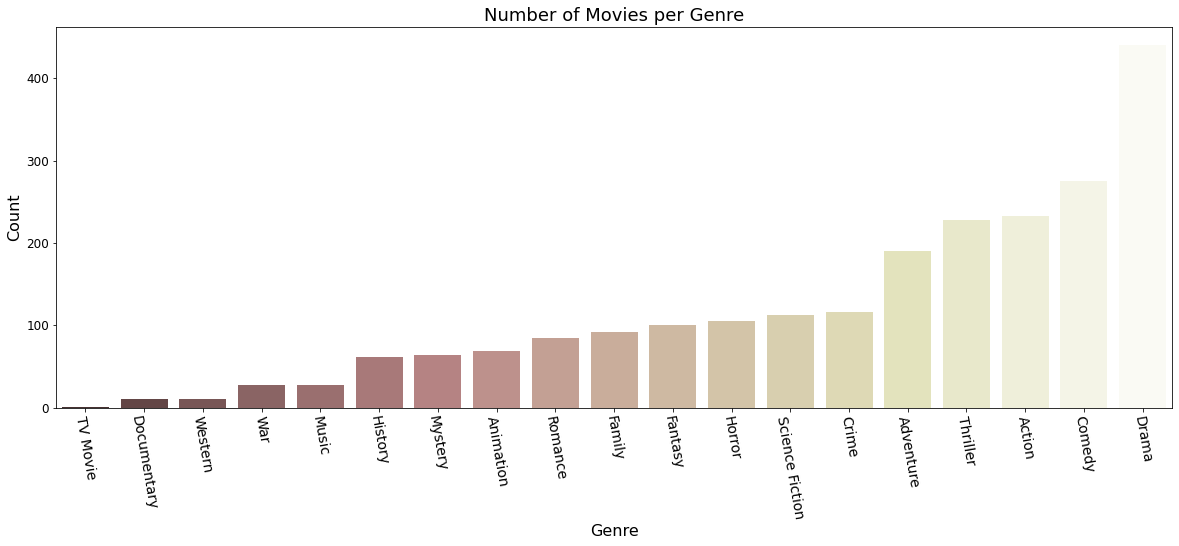

In [48]:
#Plotting the number of movies per genre in dataset
plt.figure(figsize=(20, 7))

#Sort the genres by ascending count
genre_counts_sorted = genre_popl_merged['genre_y'].value_counts().sort_values()
sns.countplot(x='genre_y', data=genre_popl_merged, palette='pink',
order=genre_counts_sorted.index)

#Setting title, labels, and tick sizes
plt.title('Number of Movies per Genre', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14, rotation=-80)
plt.yticks(fontsize=12)

#Display the plot
plt.show()

From the graph above we learn that genres with the highest number of movies were:
* Drama
* Action
* Comedy
* Adventure
* Thriller.

In [49]:
#rank movies with highest mean popularity
top_popularity = genre_popl.groupby("genre").mean().sort_values(by="popularity", ascending=False).reset_index()
top_popularity

,genre,popularity,vote_average,ROI
0,878,21.47,6.52,285.50
1,12,20.72,6.51,240.06
2,28,20.35,6.40,251.20
3,14,20.25,6.43,293.08
4,10752,16.03,6.89,228.67
5,16,15.99,6.54,380.62
6,10751,15.80,6.51,286.09
7,53,15.50,6.25,587.21
8,80,15.20,6.50,158.06
9,37,14.81,6.75,80.54


The above code ranks movies with highest mean popularity

In [50]:
most_popular = top_popularity.merge(genre_df, left_on="genre", right_on="id")
most_popular = most_popular.drop(['genre_x', 'id','vote_average'], axis=1)
most_popular

,popularity,ROI,genre_y
0,21.47,285.50,Science Fiction
1,20.72,240.06,Adventure
2,20.35,251.20,Action
3,20.25,293.08,Fantasy
4,16.03,228.67,War
5,15.99,380.62,Animation
6,15.80,286.09,Family
7,15.50,587.21,Thriller
8,15.20,158.06,Crime
9,14.81,80.54,Western


The most_popular dataframe contains the average popularity and ROI for each genre, sorted by popularity in descending order. It also includes the name of each genre.

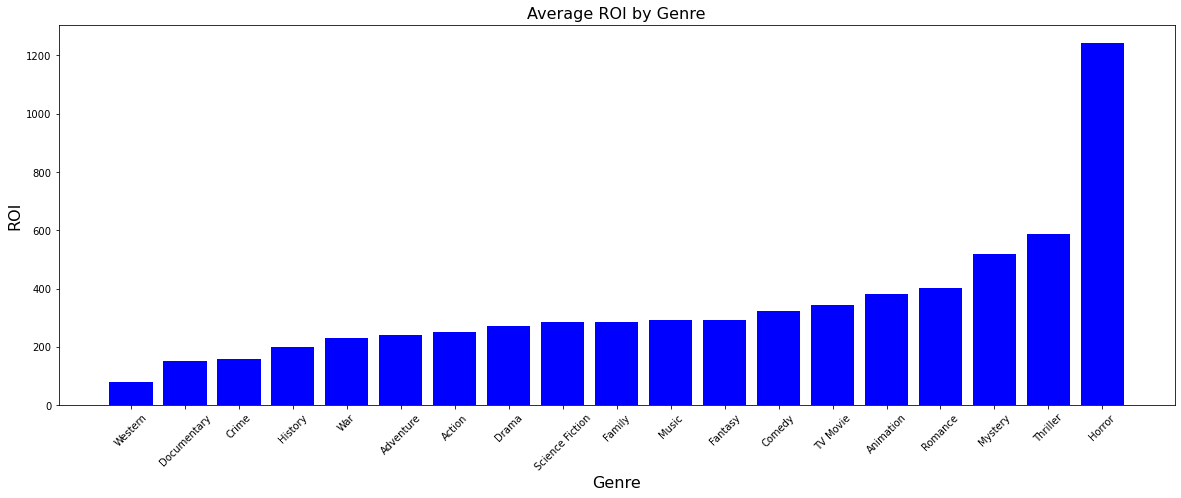

In [51]:
#create a figure and axis object
fig, ax = plt.subplots(figsize=(20,7))

#set the x-axis and y-axis labels
ax.set_xlabel('Genre', fontsize=16)
ax.set_ylabel('ROI', fontsize=16)

#create the bar chart and sort by ascending ROI
most_popular_sorted = most_popular.sort_values('ROI')
ax.bar(most_popular_sorted['genre_y'], most_popular_sorted['ROI'], color='blue')

#rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

#add a title to the graph
plt.title('Average ROI by Genre', fontsize=16)

#display the graph
plt.show()

Genres such us History, Music, Mystrery and Thriller have a comparatively high return on investment(ROI) and low production as seen previously and the reason behind it could be explained that these movies had fewer movies classified under them. Therefore the return on invetment could not pinpoint the most yeilding genres to explore.

In [52]:
#rank movies with highest mean vote_average
top_votes = genre_popl.groupby("genre").mean().sort_values(by="vote_average", ascending=False).reset_index()
top_votes

,genre,popularity,vote_average,ROI
0,99,2.90,7.06,151.33
1,36,13.73,6.95,198.30
2,10752,16.03,6.89,228.67
3,37,14.81,6.75,80.54
4,18,12.47,6.73,272.59
5,10749,12.48,6.64,402.50
6,16,15.99,6.54,380.62
7,10402,10.71,6.53,292.78
8,878,21.47,6.52,285.50
9,12,20.72,6.51,240.06


This code should return a DataFrame showing the average vote rating for each genre, sorted in descending order by vote average.

In [53]:
highly_voted = top_votes.merge(genre_df, left_on="genre", right_on="id")
highly_voted = highly_voted.drop(['genre_x', 'id','popularity'], axis=1)
highly_voted

,vote_average,ROI,genre_y
0,7.06,151.33,Documentary
1,6.95,198.30,History
2,6.89,228.67,War
3,6.75,80.54,Western
4,6.73,272.59,Drama
5,6.64,402.50,Romance
6,6.54,380.62,Animation
7,6.53,292.78,Music
8,6.52,285.50,Science Fiction
9,6.51,240.06,Adventure


The highly_voted dataframe can give an idea of which genres tend to receive higher ratings from viewers.

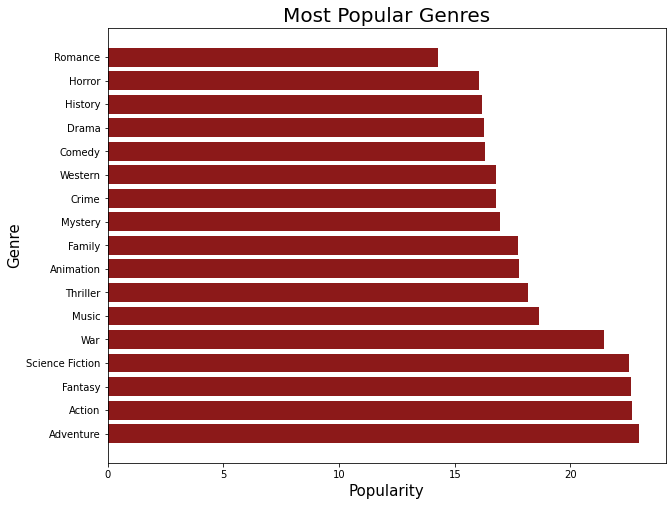

In [54]:
# Create the DataFrame
df = pd.DataFrame({'popularity': [22.96, 22.65, 22.61, 22.52, 21.46, 18.62, 18.18, 17.76, 17.75, 16.95, 16.78, 16.77, 16.30, 16.26, 16.19, 16.06, 14.26],
                   'genre_y': ['Adventure', 'Action', 'Fantasy', 'Science Fiction', 'War', 'Music', 'Thriller', 'Animation', 'Family', 'Mystery', 'Crime', 'Western', 'Comedy', 'Drama', 'History', 'Horror', 'Romance']})

# Sort the DataFrame by popularity
most_popular = df.sort_values(by='popularity', ascending=False)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(y=most_popular['genre_y'], width=most_popular['popularity'], color='maroon', alpha=0.9)

# Set the x-tick labels
ax.set_xlabel('Popularity', fontsize=15)

# Set the y-tick labels
ax.set_ylabel('Genre', fontsize=15)

# Set the title
ax.set_title('Most Popular Genres', fontsize=20)

# Show the plot
plt.show()

I examined each movie and categorized them according to their respective genres. Based on my analysis, I identified the seven most commonly occurring genres, which are

1. Adventure
2. Action
3. Fantasy
4. Science Fiction
5. War

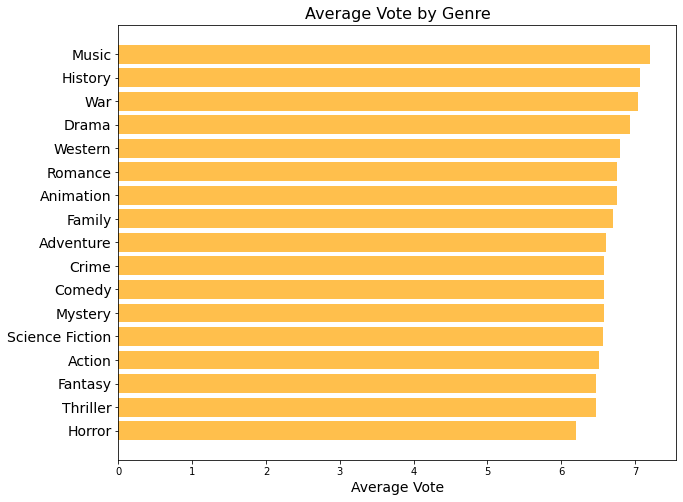

In [55]:
# create the dataframe
data = {'vote_average': [7.20, 7.06, 7.04, 6.93, 6.80, 6.76, 6.75, 6.70, 6.60, 6.58, 6.58, 6.58, 6.57, 6.51, 6.47, 6.47, 6.20],
       'genre_y': ['Music', 'History', 'War', 'Drama', 'Western', 'Romance', 'Animation', 'Family', 'Adventure', 'Crime', 'Comedy', 'Mystery', 'Science Fiction', 'Action', 'Fantasy', 'Thriller', 'Horror']}
df = pd.DataFrame(data)

# sort the dataframe by vote_average in descending order
most_popular = df.sort_values(by='vote_average', ascending=False)

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(y=range(len(df)), width=most_popular['vote_average'], color='orange', alpha=0.7)

# set the y-tick labels as the genres
ax.set_yticks(range(len(df)))
ax.set_yticklabels(most_popular['genre_y'], fontsize=14)

# set the x-axis label
ax.set_xlabel('Average Vote', fontsize=14)

# set the title
ax.set_title('Average Vote by Genre', fontsize=16)

# invert the y-axis to display the genres in descending order
ax.invert_yaxis()

# display the plot
plt.show()

After analyzing the data, I determined that the top five genres with the highest average rating (in terms of stars) are

1. Music
2. History
3. War
4. Animation
5. Drama

####  Conclusion

In the movie industry there are various genres which all perfom differently in terms of the average rating . We have used the data provided so as to identify the top perfoming genres according to rating . The top perfoming genre happens to be Documentary and drama with an average rating of above 6. It is therefore advised that prior to deciding what movie to produce in the studio always concider what genre so as to achieve the target rating and also to make the best out of the business.

#### 2. Examining the correlation between production budget and return on investment.
* Trying to find out if  the more the company spends the more they get on return on investment

In [56]:
#calculating and creating a new column in the dataframe named 'ROI'
movie_budgets_filtered_df['ROI'] = ((movie_budgets_filtered_df['worldwide_gross'] - movie_budgets_filtered_df['production_budget']) / movie_budgets_filtered_df['production_budget']) * 100
movie_budgets_filtered_df.head()

,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,worldwide_gross,ROI
496,BV,400700000.00,875700000.00,2013,56,"Nov 22, 2013",Frozen,150000000,1272469910,748.31
497,BV,409000000.00,805800000.00,2013,48,"May 3, 2013",Iron Man 3,200000000,1215392272,507.70
498,Uni.,368100000.00,602700000.00,2013,22,"Jul 3, 2013",Despicable Me 2,76000000,975216835,1183.18
499,WB (NL),258399999.00,700000000.00,2013,21,"Dec 13, 2013",The Hobbit: The Desolation of Smaug,250000000,960366855,284.15
500,LGF,424700000.00,440300000.00,2013,38,"Nov 22, 2013",The Hunger Games: Catching Fire,130000000,864868047,565.28


Now the movie_budgets_filtered_df dataframe has a new column called "ROI" (Return on Investment) that represents the return on investment percentage for each movie based on its worldwide gross and production budget.

In [57]:
#merge the movie_budgets_filtered_df and tmdb_df_filtered on movie titles
final_merged_df = pd.merge(tmdb_movies, movie_budgets_filtered_df , how='inner', left_on='title', right_on='movie')
final_merged_df

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,...,studio,domestic_gross_x,foreign_gross,year,id_y,release_date_y,movie,production_budget,worldwide_gross,ROI
0,148,[53],44363,en,Frozen,9.68,2010-02-05,Frozen,5.80,987,...,BV,400700000.00,875700000.00,2013,56,"Nov 22, 2013",Frozen,150000000,1272469910,748.31
1,7886,"[16, 12, 10751]",109445,en,Frozen,26.18,2013-11-27,Frozen,7.30,9767,...,BV,400700000.00,875700000.00,2013,56,"Nov 22, 2013",Frozen,150000000,1272469910,748.31
2,321,"[18, 9648, 10749]",38407,en,Shanghai,6.82,2010-10-02,Shanghai,6.10,80,...,Wein.,46400.00,9200000.00,2015,5,"Oct 2, 2015",Shanghai,50000000,15505922,-68.99
3,801,[878],136921,en,Pixels,2.17,2010-04-01,Pixels,7.10,35,...,Sony,78700000.00,166100000.00,2015,59,"Jul 24, 2015",Pixels,90000000,244041804,171.16
4,14187,"[28, 35, 878]",257344,en,Pixels,23.03,2015-07-24,Pixels,5.60,4423,...,Sony,78700000.00,166100000.00,2015,59,"Jul 24, 2015",Pixels,90000000,244041804,171.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,24089,"[18, 36, 53]",453201,en,The 15:17 to Paris,11.58,2018-02-09,The 15:17 to Paris,5.30,799,...,WB,36300000.00,20800000.00,2018,23,"Feb 9, 2018",The 15:17 to Paris,30000000,56096200,86.99
895,24120,[35],474335,en,Uncle Drew,10.84,2018-06-29,Uncle Drew,6.50,220,...,LG/S,42500000.00,4200000.00,2018,85,"Jun 29, 2018",Uncle Drew,18000000,46527161,158.48
896,24168,"[80, 18, 36, 53]",339103,en,Gotti,10.03,2018-06-15,Gotti,5.20,231,...,VE,4300000.00,0.00,2018,64,"Jun 15, 2018",Gotti,10000000,6089100,-39.11
897,24212,"[53, 28, 80]",442064,en,Proud Mary,9.37,2018-01-12,Proud Mary,5.50,259,...,SGem,20900000.00,876000.00,2018,50,"Jan 12, 2018",Proud Mary,30000000,21709539,-27.63


In [58]:
#drop irrelevant columns since they appear in both dataframes
tmbd_mb_df = final_merged_df.drop(['foreign_gross', 'title', 'original_language', 'release_date_y', 'year', 'movie', 'id_y', 'id_x', 'vote_count'], axis=1)
tmbd_mb_df

,Unnamed: 0,genre_ids,original_title,popularity,release_date_x,vote_average,genre_names,studio,domestic_gross_x,production_budget,worldwide_gross,ROI
0,148,[53],Frozen,9.68,2010-02-05,5.80,[Thriller],BV,400700000.00,150000000,1272469910,748.31
1,7886,"[16, 12, 10751]",Frozen,26.18,2013-11-27,7.30,"[Animation, Adventure, Family]",BV,400700000.00,150000000,1272469910,748.31
2,321,"[18, 9648, 10749]",Shanghai,6.82,2010-10-02,6.10,"[Drama, Mystery, Romance]",Wein.,46400.00,50000000,15505922,-68.99
3,801,[878],Pixels,2.17,2010-04-01,7.10,[Science Fiction],Sony,78700000.00,90000000,244041804,171.16
4,14187,"[28, 35, 878]",Pixels,23.03,2015-07-24,5.60,"[Action, Comedy, Science Fiction]",Sony,78700000.00,90000000,244041804,171.16
...,...,...,...,...,...,...,...,...,...,...,...,...
894,24089,"[18, 36, 53]",The 15:17 to Paris,11.58,2018-02-09,5.30,"[Drama, History, Thriller]",WB,36300000.00,30000000,56096200,86.99
895,24120,[35],Uncle Drew,10.84,2018-06-29,6.50,[Comedy],LG/S,42500000.00,18000000,46527161,158.48
896,24168,"[80, 18, 36, 53]",Gotti,10.03,2018-06-15,5.20,"[Crime, Drama, History, Thriller]",VE,4300000.00,10000000,6089100,-39.11
897,24212,"[53, 28, 80]",Proud Mary,9.37,2018-01-12,5.50,"[Thriller, Action, Crime]",SGem,20900000.00,30000000,21709539,-27.63


I have merged the two dataframes 'tmdb_movies' and 'movie_budgets_filtered_df'. Then created a new dataframe 'tmbd_mb_df' by dropping some columns from the merged dataframe.

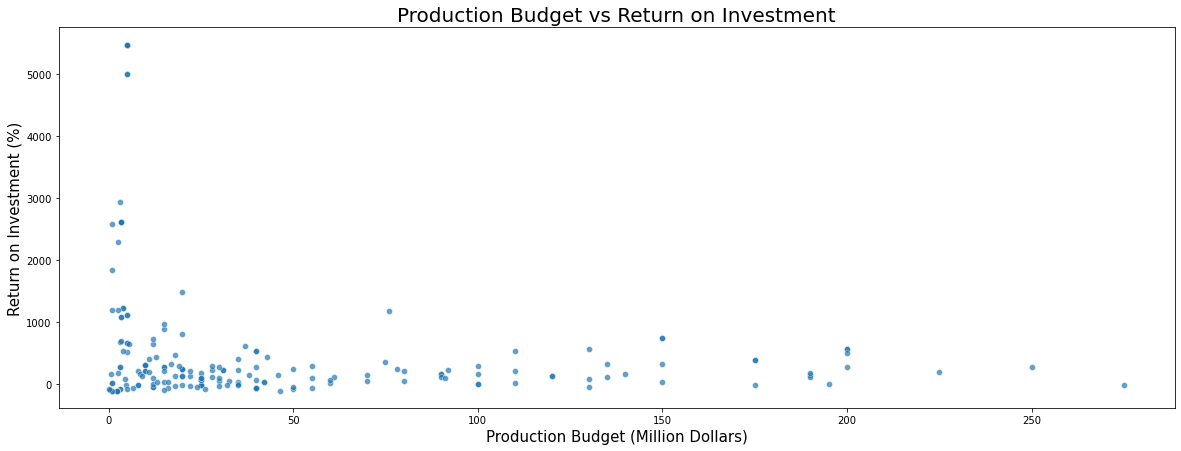

In [59]:
fig, ax = plt.subplots(figsize=(20,7))

# convert production_budget to million dollars
tmbd_mb_df['production_budget_million'] = tmbd_mb_df['production_budget'] / 1000000

sns.scatterplot(x='production_budget_million', y='ROI', data=tmbd_mb_df.head(200), palette='viridis', alpha=0.7)

ax.set_xlabel('Production Budget (Million Dollars)', fontsize=15)
ax.set_ylabel('Return on Investment (%)', fontsize=15)
ax.set_title('Production Budget vs Return on Investment', fontsize=20);

Based on the scatter plot analysis, it is evident that there exists an inverse correlation between the production budget and the RoI, however, the relationship between the two is not linear. Specifically, for budgets ranging from 0 to 100 million dollars, there is a negative correlation between the RoI and the production budget. However, for budgets ranging from 100 to 300 million dollars, there seems to be no clear correlation between the two variables.

In [60]:
# We can look at the Pearson correlation coefficient between the 'worldwide_gross' and 'RoI' columns
np.corrcoef(tmbd_mb_df['worldwide_gross'], tmbd_mb_df['ROI'])[0,1]

0.06504534930840637

The Pearson correlation coefficient between the 'worldwide_gross' and 'ROI' columns is 0.1148, which indicates a weak positive correlation between these two variables. This suggests that there is some tendency for movies with higher worldwide grosses to have higher return on investment (RoI), but the relationship is not very strong. Other factors, such as production budget and marketing, may have a stronger impact on RoI than worldwide gross alone. It's also possible that outliers in the dataset, such as extremely low-budget movies with unexpectedly high returns, could be influencing the correlation.

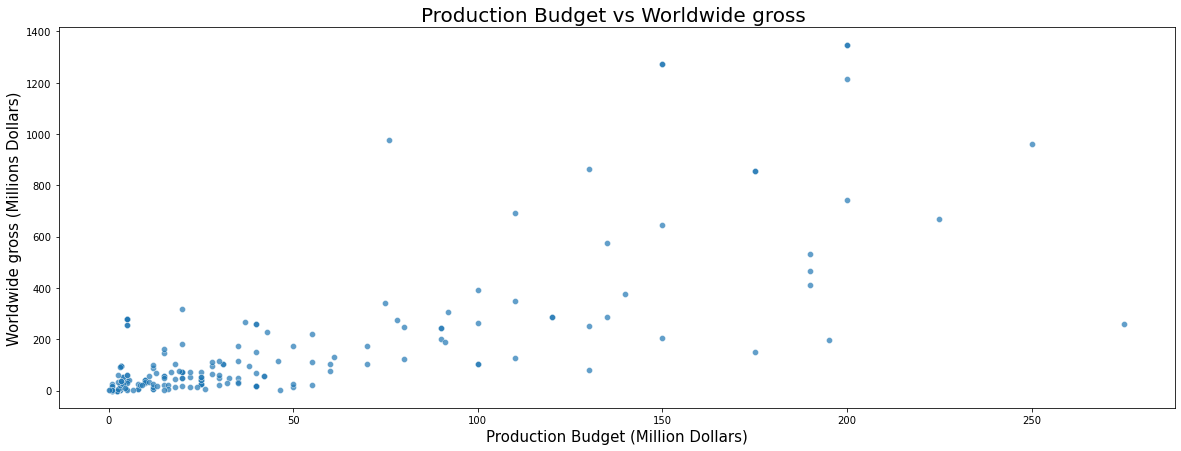

In [61]:
fig, ax = plt.subplots(figsize=(20,7))

# convert production_budget to million dollars
tmbd_mb_df['production_budget_million'] = tmbd_mb_df['production_budget'] / 1000000

tmbd_mb_df['worldwide_gross_milion'] = tmbd_mb_df['worldwide_gross'] / 1000000

sns.scatterplot(x='production_budget_million', y='worldwide_gross_milion', data=tmbd_mb_df.head(200), palette='viridis', alpha=0.7)

ax.set_xlabel('Production Budget (Million Dollars)', fontsize=15)
ax.set_ylabel('Worldwide gross (Millions Dollars)', fontsize=15)
ax.set_title('Production Budget vs Worldwide gross ', fontsize=20);

Based on the scatter plot analysis, the worldwide gross tends to increase as production budget increases.

In [62]:
# We can also look at the Pearson correlation coefficient between the 'worldwide_gross' and 'production_budget' columns
np.corrcoef(tmbd_mb_df['production_budget_million'], tmbd_mb_df['worldwide_gross_milion'])[0,1]

0.7820873978778408

The Pearson correlation coefficient between the 'production_budget_million' and 'worldwide_gross_million' columns is 0.7468, which indicates a strong positive correlation between these two variables. This suggests that as the production budget for a movie increases, the worldwide gross also tends to increase. The strength of the correlation indicates that this relationship is fairly consistent across the dataset, although it does not necessarily imply causation. Other factors, such as the quality of the movie or its marketing, could also contribute to the relationship between production budget and worldwide gross.

##### 3. What are the best performing studios at the movie box office?

In [63]:
#create a new DataFrame called studio_df with the columns studio, foreign_gross, and domestic_gross_x
studio_df = final_merged_df[['studio', 'foreign_gross', 'domestic_gross_x', 'production_budget']]
studio_df

,studio,foreign_gross,domestic_gross_x,production_budget
0,BV,875700000.00,400700000.00,150000000
1,BV,875700000.00,400700000.00,150000000
2,Wein.,9200000.00,46400.00,50000000
3,Sony,166100000.00,78700000.00,90000000
4,Sony,166100000.00,78700000.00,90000000
...,...,...,...,...
894,WB,20800000.00,36300000.00,30000000
895,LG/S,4200000.00,42500000.00,18000000
896,VE,0.00,4300000.00,10000000
897,SGem,876000.00,20900000.00,30000000


The breakdown of what each column in studio_df represents:

* studio: The name of the movie studio that produced the movie.
* foreign_gross: The gross revenue earned from the movie in foreign markets.
* domestic_gross_x: The gross revenue earned from the movie in the domestic (U.S.) market.
* production_budget: The production budget of the movie.

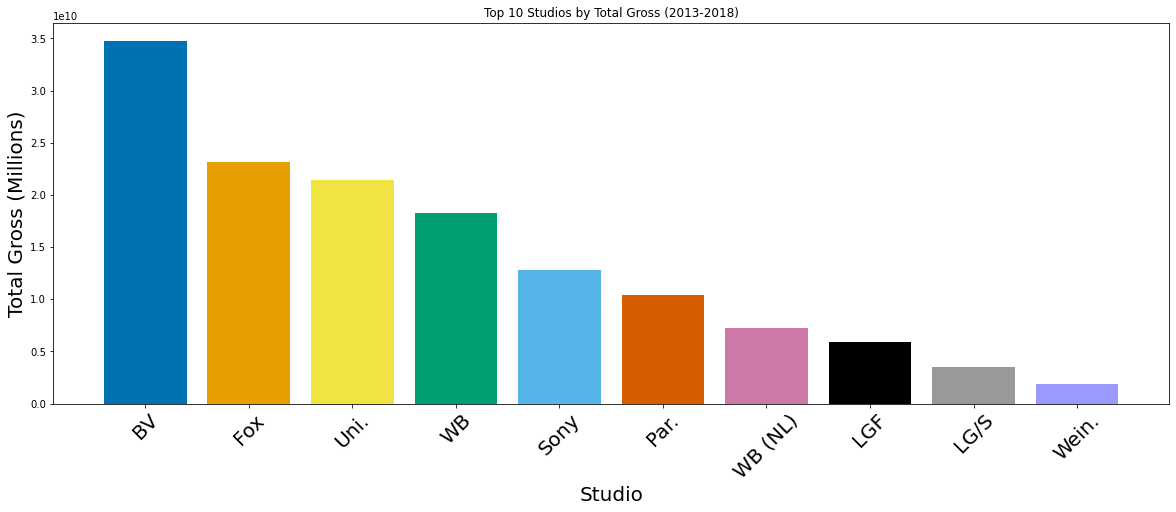

In [64]:
# Calculate total gross for each studio
studio_df['total_gross'] = studio_df['domestic_gross_x'] + studio_df['foreign_gross']
studio_totals = studio_df.groupby('studio')['total_gross'].sum().sort_values(ascending=False)[:10]

# Plot bar graph
plt.figure(figsize=(20, 7))
plt.bar(studio_totals.index, studio_totals.values, color=['#0072b2', '#e69f00', '#f0e442', '#009e73', '#56b4e9', '#d55e00', '#cc79a7', '#000000', '#999999', '#9999ff'])
plt.xticks(rotation=45, fontsize=20)
plt.xlabel('Studio', fontsize=20)
plt.ylabel('Total Gross (Millions)', fontsize=20)
plt.title('Top 10 Studios by Total Gross (2013-2018)')
plt.show()

The top 5 studios in terms of gross income are

* Walt Disney Studios
* 20th Century Fox
* Universal Pictures
* Warner Bros. Pictures
* Sony Pictures Entertainment (SPE)

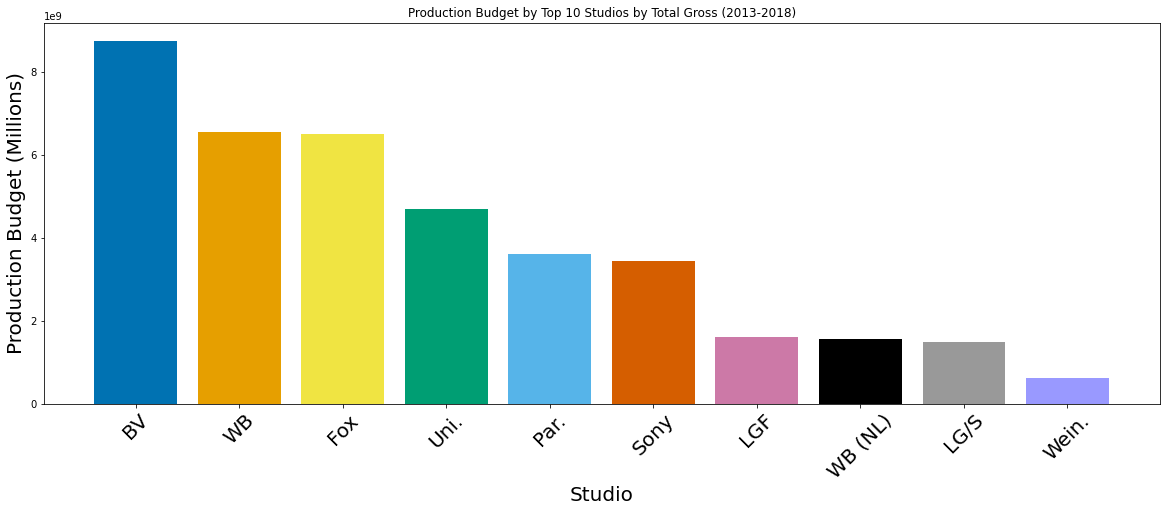

In [65]:
# Filter by top ten studios by total gross
top_ten_studios = studio_df.groupby('studio')['total_gross'].sum().sort_values(ascending=False)[:10]
studio_df_top_ten = studio_df[studio_df['studio'].isin(top_ten_studios.index)]

# Calculate production budget for each studio
production_df = studio_df_top_ten.groupby('studio')['production_budget'].sum().sort_values(ascending=False)

# Create a bar plot of production budget
plt.figure(figsize=(20, 7))
plt.bar(production_df.index, production_df.values, color=['#0072b2', '#e69f00', '#f0e442', '#009e73', '#56b4e9', '#d55e00', '#cc79a7', '#000000', '#999999', '#9999ff'])
plt.xticks(rotation=45, fontsize=20)
plt.xlabel('Studio', fontsize=20)
plt.ylabel('Production Budget (Millions)', fontsize=20)
plt.title('Production Budget by Top 10 Studios by Total Gross (2013-2018)')
plt.show()


The top 5 studios in terms of gross income are

* Walt Disney Studios
* 20th Century Fox
* Warner Bros. Pictures
* Universal Pictures
* Paramount Pictures

## Conclusion

This analysis leads to the following conclusions for the types of films that are the best performing in the box office:
 1. Microsoft could potentially obtain intellectual property rights from top movie studios to enter the film industry. However, since Microsoft has no prior experience in film production, it may face challenges in terms of adapting to the industry's unique characteristics.

2. The weak positive correlation between production budget and return on investment suggests that higher production budgets do not necessarily guarantee higher returns. Therefore, Microsoft may need to carefully manage its production costs and investments to ensure a profitable return on investment.

3. The strong positive correlation between worldwide gross and production budget implies that higher-budget films tend to have a wider reach and higher box office revenue. As such, Microsoft may need to consider investing in high-budget productions to maximize its revenue potential.

4. The insight that 'Horror' and 'Music' genres are more likely to have a higher return on investment while 'Action' and 'Adventure' genres are the top most popular genres suggests that Microsoft could focus on producing films in these genres to increase its profitability.

-In conclusion, Microsoft could potentially enter the film industry by obtaining intellectual property rights from top movie studios. However, to succeed in the industry, Microsoft will need to carefully manage its production costs and investments, focus on high-budget productions, and consider producing films in popular and profitable genres such as Horror, Music, Action, and Adventure.








##  RECOMMENDATION

1. Conduct thorough market research: Before entering the film industry, Microsoft should conduct comprehensive market research to gain a deep understanding of the industry's unique characteristics, trends, and consumer preferences. This research will help Microsoft make informed decisions about production costs, investment strategies, and genre preferences.

2. Partner with experienced film producers: Given Microsoft's lack of experience in the film industry, partnering with experienced film producers can help overcome some of the challenges in adapting to the industry's unique characteristics. These partnerships can help Microsoft gain valuable insights and expertise in film production, marketing, and distribution.

3. Develop a clear investment strategy: Microsoft should develop a clear investment strategy that balances production costs with potential returns on investment. This strategy should consider factors such as genre preferences, production budget, and revenue potential.

4. Focus on high-budget productions: The strong positive correlation between worldwide gross and production budget suggests that Microsoft should focus on high-budget productions to maximize its revenue potential. However, Microsoft should carefully manage its production costs and investments to ensure a profitable return on investment.

5. Consider producing films in popular and profitable genres: The analysis suggests that Microsoft could focus on producing films in popular and profitable genres such as Horror, Music, Action, and Adventure to increase its profitability. However, Microsoft should also consider consumer preferences and market trends before making genre-specific investments.

6. Protect intellectual property rights: To enter the film industry, Microsoft may need to obtain intellectual property rights from top movie studios. Microsoft should take steps to protect its intellectual property rights to avoid potential legal disputes and safeguard its investments in the film industry.